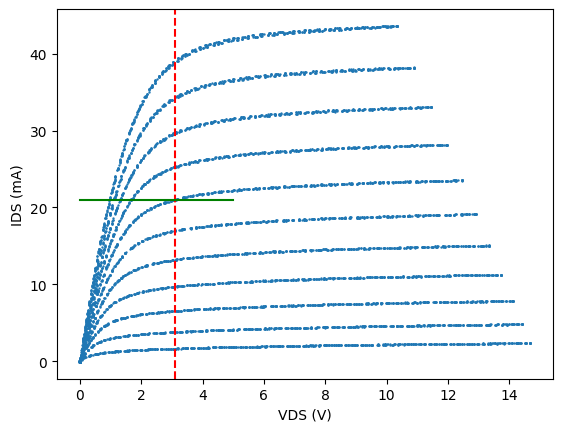

In [84]:
#Plot data in part1.csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('curveTrace.csv', skiprows=28, encoding='latin-1')

plt.scatter(df['Channel 1 (V)'], df['Math 1 (A)'] * 1000, s=.5)
plt.xlabel('VDS (V)')
plt.ylabel('IDS (mA)')

#Plot x=3.1
plt.axvline(x=3.1, color='r', linestyle='--', label='VDS=3.1V')

x = np.linspace(0, 5, 100)
y = np.linspace(21, 21, 100)
plt.plot(x, y, '-g', label='IDS=38mA')

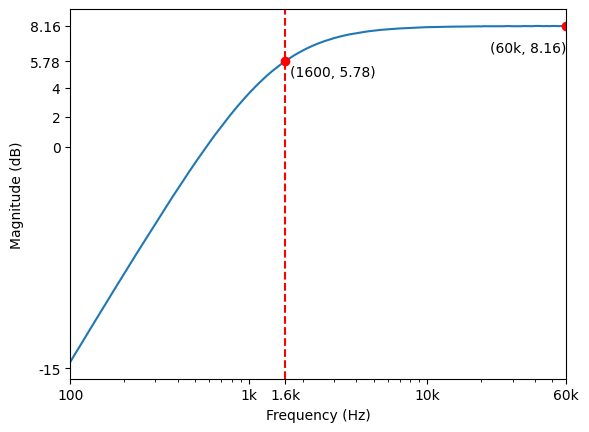

In [70]:
freq = 1600

from scipy.interpolate import interp1d

df = pd.read_csv('dbGain.csv',skiprows=20, encoding='latin-1')
plt.figure()

plt.plot(df['Frequency (Hz)'], df['Channel 2 Magnitude (dB)'])
# Log scale the x-axis
plt.xscale('log')
plt.xlim(100, 60000)
#Tick marks on the x-axis
plt.xticks([100, 1000, 1600, 10000, 60000],["100", "1k", "1.6k", "10k", "60k"])

plt.yticks([-15, 0, 2, 4, 5.78, 8.16], ["-15", "0", "2", "4", "5.78", "8.16"])

# Use interpolation to find the approximate y-value
interpolator = interp1d(df['Frequency (Hz)'], df['Channel 2 Magnitude (dB)'], kind='linear')
y_value = interpolator(freq)

#Label 1600Hz on the x-axis grid
plt.axvline(x=freq, color='r', linestyle='--', label='1600Hz')
#Label the point (1600, y_value) on the plot
plt.plot(freq, y_value, 'ro')
#Add the text to the graph and round the y_value to 2 decimal places
plt.text(freq + 100, y_value - 1, '({}, {})'.format(1600, np.round(y_value, 2)))

#Get the last value
plt.plot(df['Frequency (Hz)'].iloc[-1], df['Channel 2 Magnitude (dB)'].iloc[-1], 'ro')
plt.text(df['Frequency (Hz)'].iloc[-1] + 100, df['Channel 2 Magnitude (dB)'].iloc[-1] - 1, '({}, {})'.format("60k", np.round(df['Channel 2 Magnitude (dB)'].iloc[-1], 2)), ha='right', va='top')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

plt.show()


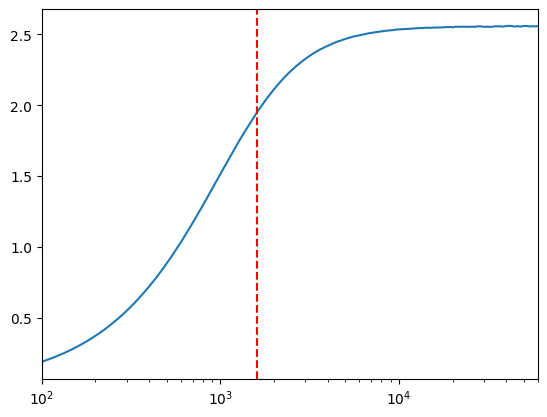

In [74]:
#Plotting the Gain
G = 10**(df['Channel 2 Magnitude (dB)']/20)
plt.figure()
plt.plot(df['Frequency (Hz)'], G)
# Log scale the x-axis
plt.xscale('log')
plt.xlim(100, 60000)
#Plot avx = 1600
plt.axvline(x=freq, color='r', linestyle='--', label='1600Hz')
